In [ ]:
import numpy as np


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install nltk

In [ ]:
pip install sklearn

In [ ]:
pip install scikit-learn


In [ ]:
pip install sklearn.model

In [ ]:
pip install wordcloud

In [ ]:
pip install xgboost

In [ ]:
import re

In [ ]:
data = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [ ]:
print(f"Dataset shape : {data.shape}")

In [ ]:
data.head()

In [ ]:
print(f"feature names : {data.columns.values}")

In [ ]:
data.isnull().sum()

In [ ]:
data[data['verified_reviews'].isna() == True]

In [ ]:
data.dropna(inplace=True)

In [ ]:
data[data['verified_reviews'].isna() == True]

In [ ]:
data.isnull().sum()

In [ ]:
data['length'] = data['verified_reviews'].apply(len)

In [ ]:
data.shape()

In [ ]:
data.shape

In [ ]:
data.head

In [ ]:
DATA.HEAD()

In [ ]:
data.head

In [ ]:
data.head()

In [ ]:
data.head()

In [ ]:
print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}")

In [ ]:
print(f"length of review : {len(data.iloc[10]['verified_reviews'])}")

In [ ]:
print(f"length is : {data.iloc[10]['length']}")

In [ ]:
data.dtypes

In [ ]:
print(f"rating value count : \n{data['rating'].value_counts()}")

In [ ]:
data['rating'].value_counts().plot.bar(color = 'red')
plt.title("Rating distribution count")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue', 'orange', 'yellow')

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [ ]:
print(f"Feedback value count: \n{data['feedback'].value_counts()}")


In [ ]:
data[data['feedback'] == 1].iloc[1]['verified_reviews']

In [ ]:
data['feedback'].value_counts().plot.bar(color = 'green')

In [ ]:
data['feedback'].value_counts().plot.bar(color = 'green')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [ ]:
print(f"percentage : \n{data[(data['feedback']== 1) | (data['feedback'] == 0)]['feedback'].value_counts()/data.shape[0]*100}")

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [ ]:
print(f"Variation value count: \n{data['variation'].value_counts()}")


In [ ]:
data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")


In [ ]:
data.groupby('variation')['rating'].mean()

In [ ]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'purple', figsize = (11, 6))

In [ ]:
data['length'].describe()

In [ ]:
sns.histplot(data['length'], color = 'blue').set(title = 'Distribution of length of review')

In [ ]:
sns.histplot(data[data['feedback'] == 0]['length'], color = 'green')

In [ ]:
data.groupby('length')['rating'].mean().plot.hist(color = 'green')

In [ ]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)

In [ ]:
print(words)

In [ ]:
reviews = " ".join([review for review in data['verified_reviews']])

In [ ]:
print(reviews)

In [ ]:
wc = WordCloud(background_color = 'white', max_words = 50)
plt.figure(figsize = (10,10))
plt.imshow(wc.generate(reviews))
plt.title('WordCloud for all reviews', fontsize = 10)
plt.axis('off')
plt.show()

In [ ]:
neg_reviews = " ".join([review for review in data[data['feedback']==0]['verified_reviews']])

In [ ]:
print(neg_reviews) %capture

In [ ]:
neg_reviews = neg_reviews.lower().split() 

In [ ]:
print(neg_reviews)

In [ ]:
pos_reviews = " ".join([review for review in data[data['feedback']==1]['verified_reviews']])

In [ ]:
pos_reviews = pos_reviews.lower().split()

In [ ]:
unique_negative = [x for x in neg_reviews if x not in pos_reviews]

In [ ]:
print(unique_negative)

In [ ]:
unique_negative = " ".join(unique_negative)

In [ ]:
unique_positive = [x for x in pos_reviews if x not in neg_reviews]

In [ ]:
unique_positive = " ".join(unique_positive)

In [ ]:
print(unique_positive)

In [ ]:
wc = WordCloud(background_color = 'White', max_words = 50)

plt.figure(figsize = (10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('WordCloud for negative reviews', fontsize = 10)
plt.axis('off')
plt.show()

plt.figure(figsize = (10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('WordCloud for positive reviews', fontsize = 10)
plt.axis('off')
plt.show()

In [ ]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [ ]:
print(X)
print(cv.get_feature_names_out())

In [ ]:
print(y)
print(cv.vocabulary_)

In [ ]:
word_counts = np.sum(X, axis = 0)
words = cv.get_feature_names_out()
word_count_dict = dict(zip(words, word_counts))
#print(word_count_dict)
print(word_count_dict['love'])

In [ ]:
print(cv)

In [ ]:
print(X)

In [ ]:
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

In [ ]:
import pickle

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)
print(f"X train : {X_train.shape}")
print(f"y train : {y_train.shape}")
print(f"X test : {X_test.shape}")
print(f"y test : {y_test.shape}")

In [ ]:
data.shape

In [ ]:
print(X_train.max())

In [ ]:
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
words = cv.get_feature_names_out()


In [ ]:
pprint(words)

In [ ]:
from pprint import pprint

In [ ]:
for item in words: print(item)

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

In [ ]:
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))


In [ ]:
y_preds = model_rf.predict(X_test_scl)

In [ ]:
cm = confusion_matrix(y_test, y_preds)

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf.classes_)
cm_display.plot()
plt.show()

In [ ]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)
print(accuracies.mean())
print(accuracies.std())

In [ ]:
print(y_train)
print(y_train.ravel())
    

In [ ]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [ ]:
cv_object = StratifiedKFold(n_splits = 2)



In [ ]:
grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv=cv_object, verbose = 0, return_train_score = True)

In [ ]:
grid_search.fit(X_train_scl, y_train.ravel())

In [ ]:
print("best parameters: {}". format(grid_search.best_params_))

In [210]:
print("cross validation across train data : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))

cross validation across train data : 96.77858439201452


In [211]:
print("cross validation across test data : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))

cross validation across test data : 92.15063520871144


In [ ]:
print("accuracy: ", accuracy_score(y_test, y_preds))

In [207]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [209]:
print(model_xgb.score(X_train_scl, y_train))
print(model_xgb.score(X_test_scl, y_test))


0.971415607985481
0.9417989417989417


In [212]:
y_preds = model_xgb.predict(X_test)

In [213]:
cm= confusion_matrix(y_test, y_preds)
print(cm)

[[ 31  47]
 [ 13 854]]


In [216]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_xgb.classes_)

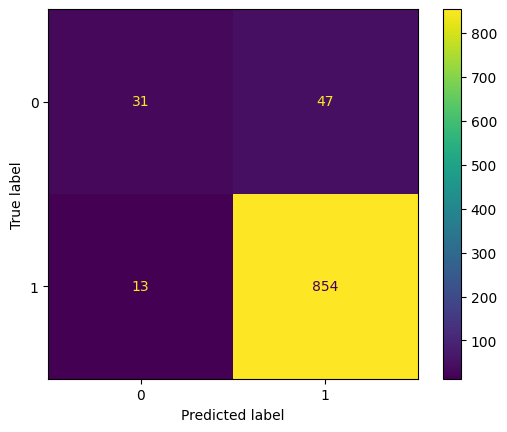

In [217]:
cm_display.plot()

pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))

In [218]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl,y_train)

DecisionTreeClassifier()

In [220]:
print(model_dt.score(X_train_scl, y_train))
print(model_dt.score(X_test_scl, y_test))

0.9945553539019963
0.9216931216931217


In [221]:
y_preds = model_dt.predict(X_test)

In [222]:
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 38  40]
 [ 75 792]]


In [223]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_dt.classes_)

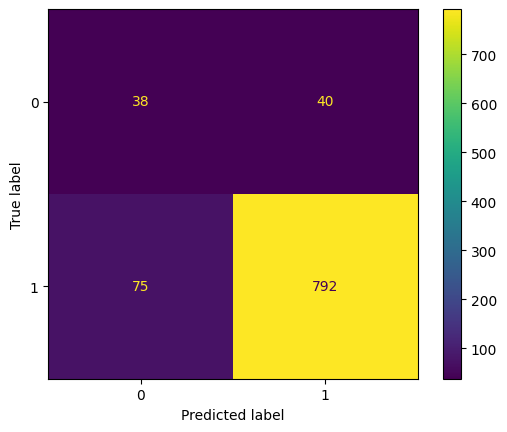

In [224]:
cm_display.plot()